In [24]:
# Veri setini okuma
import pandas as pd

df = pd.read_excel('veri.xlsx')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [25]:
# Veri setini inceleme
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [27]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [28]:
df.duplicated().sum()

0

In [29]:
# Veri setinin kopyasını alma
data = df.copy()

c:\Users\Turhan Göksu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


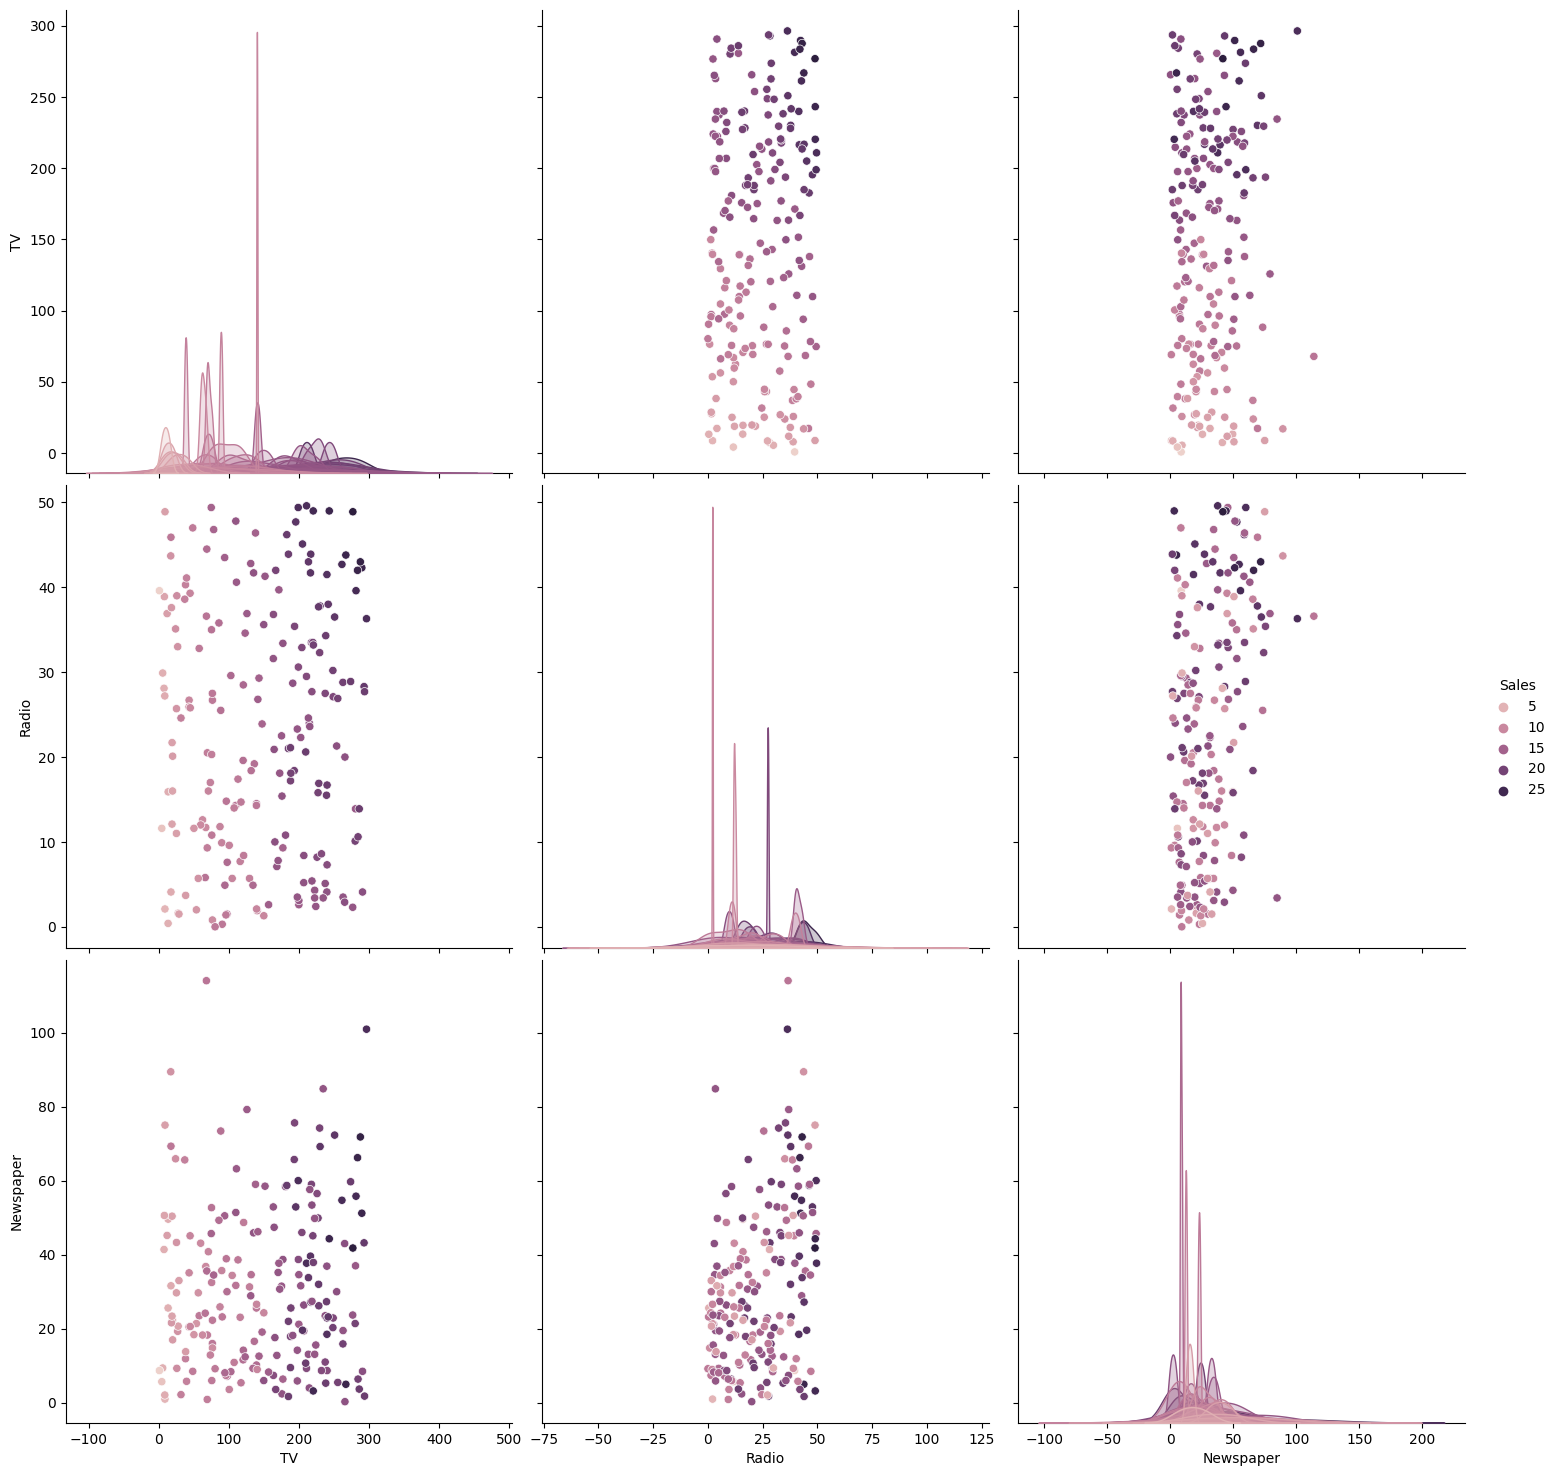

In [30]:
# Çiftler arası ilişkileri görselleştirme

import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data, hue = 'Sales', height = 5)
plt.show()

In [31]:
# X ve y split işlemi

X = data['Sales'].values.reshape(-1, 1)
y = data['Sales']

In [32]:
# Veriyi eğitim ve test setlerine böleme

from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
# Lineer regresyon modelini oluşturma

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [34]:
# Modeli eğitme

model.fit(X_train, y_train)

LinearRegression()

In [35]:
# Eğitilmiş modeli kullanarak tahmin yapma

y_pred = model.predict(X_test)

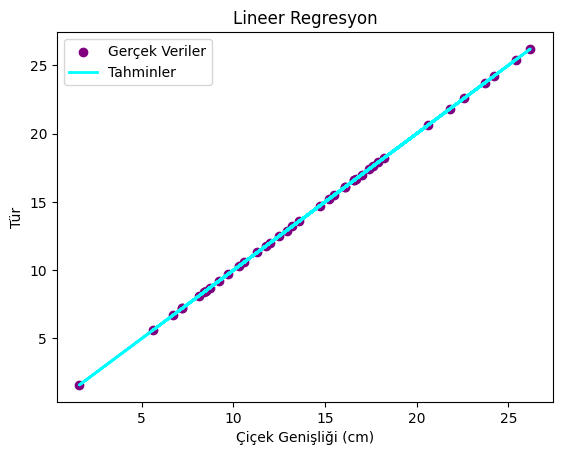

In [36]:
# Sonuçları görselleştirme

plt.scatter(X_test, y_test, color='purple', label='Gerçek Veriler')
plt.plot(X_test, y_pred, color='cyan', linewidth=2, label='Tahminler')
plt.xlabel('Çiçek Genişliği (cm)')
plt.ylabel('Tür')
plt.title('Lineer Regresyon')
plt.legend()
plt.show()

In [37]:
# r2 ve mse değerleri
from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R^2 Skoru:", r2)
print("Ortalama Kare Hatası:", mse)

R^2 Skoru: 1.0
Ortalama Kare Hatası: 7.465828910818233e-30
